# MCF ensembles

We compute MCF persistent homology for 100 realisations of each model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns

from pathlib import Path
from mcf.bootstrapping import plot_pds

In [2]:
root = str(Path.cwd().parents[0]) + "/"
root_fig = root + "figures/"
root_data = root + "experiments/"
plt.rcParams.update({'font.size': 20})

In [3]:
min_scale = -1.5
max_scale = 0.5
log_scales = np.around(np.linspace(min_scale,max_scale,200),2)

## 1) ER ensemble

### 100 ER realisations ###

Mean pair-wise bottleneck distance for 0-dimensional Dgm:  0.09476
Mean pair-wise bottleneck distance for 1-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 2-dimensional Dgm:  inf


Mean pair-wise 2-Wasserstein distance for 0-dimensional Dgm:  0.491
Mean pair-wise 2-Wasserstein distance for 1-dimensional Dgm:  4.087
Mean pair-wise 2-Wasserstein distance for 2-dimensional Dgm:  inf

Average persistent hierarchy: 0.301


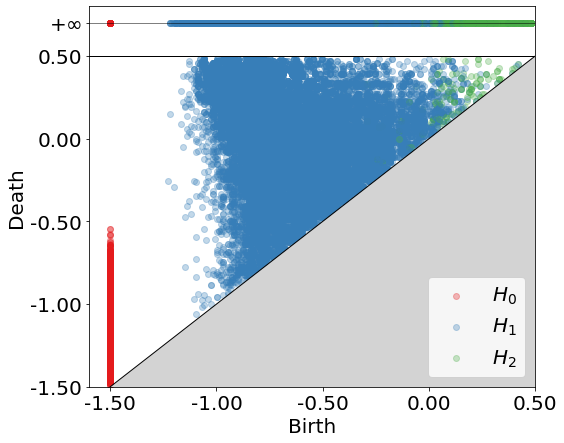

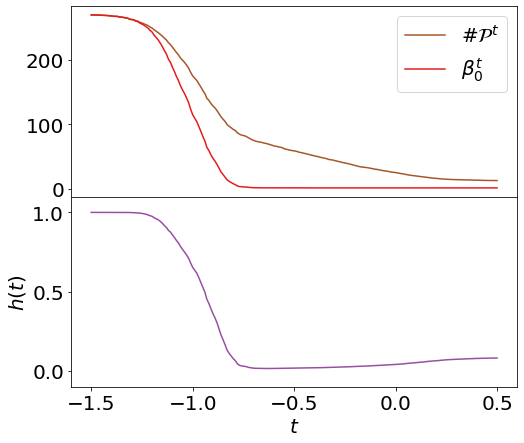

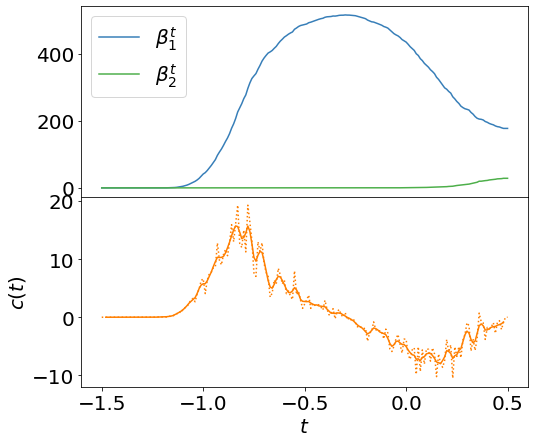

In [14]:
# load data
with open(root_data+'ensemble_ER_07-06_15_20.pkl', 'rb') as handle:
    results_er = pickle.load(handle)

persistence_er = results_er['persistence']
bottleneck_er = results_er['bottleneck']
wasserstein_er = results_er['wasserstein']
s_er = np.asarray(results_er["size_partitions"])
b0_er = np.asarray([results_er["bettis"][i][0] for i in range(100)])
b1_er = np.asarray([results_er["bettis"][i][1] for i in range(100)])
b2_er = np.asarray([results_er["bettis"][i][2] for i in range(100)])
h_er = np.asarray(results_er["persistent_hierarchy"])
h_bar_er = np.asarray(results_er["average_persistent_hierarchy"])
c_er = np.asarray(results_er["persistent_conflict"])

# report bottleneck and Wasserstein distance
print('### 100 ER realisations ###\n')

for i in range(3):
    print('Mean pair-wise bottleneck distance for {}-dimensional Dgm: '.format(i), np.around(bottleneck_er[:,:,i].mean(),5))
print("\n")
for i in range(3):  
    print('Mean pair-wise 2-Wasserstein distance for {}-dimensional Dgm: '.format(i), np.around(wasserstein_er[:,:,i].mean(),3))

# plot PD
ax = plot_pds(persistence_er, log_scales, alpha=0.3)
plt.savefig(root_fig +'ensemble_ER_PD.pdf', bbox_inches='tight')

# plot persistent hierarchy and conflict
colormap = plt.cm.Set1.colors

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(log_scales,s_er.mean(axis=0), label = r'$\#\mathcal{P}^t$', color=colormap[6])
ax1.plot(log_scales,b0_er.mean(axis=0), label = r'$\beta_0^t$', color=colormap[0])
ax1.set(xticks=[])

ax1.legend()
ax2.plot(log_scales,h_er.mean(axis=0), label = r'$h(t)$',c=colormap[3])
ax2.set_ylabel(r'$h(t)$')
ax2.set(xlabel=r'$t$',ylim=(-0.1,1.1))
plt.savefig(root_fig +'ensemble_ER_hierarchy.pdf', dpi=fig.dpi,bbox_inches='tight')

print("\nAverage persistent hierarchy:", np.around(h_bar_er.mean(),3))

import pandas as pd

def moving_average(x, w):
    return np.roll(
        np.asarray(pd.Series(x).rolling(window=w, win_type="triang").mean()),
        -int(w / 2),
    )

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]

ax1.plot(log_scales,b1_er.mean(axis=0), label = r'$\beta_1^t$', color=colormap[1])
ax1.plot(log_scales,b2_er.mean(axis=0), label = r'$\beta_2^t$',color=colormap[2])

ax1.set(xticks=[])

ax1.legend()
ax2.plot(log_scales,c_er.mean(axis=0),c=colormap[4],ls=":")
ax2.plot(log_scales,moving_average(c_er.mean(axis=0),5),c=colormap[4])
ax2.set_ylabel(r'$c(t)$')
ax2.set(xlabel=r'$t$')
plt.savefig(root_fig +'ensemble_ER_conflict.pdf', dpi=fig.dpi,bbox_inches='tight')
    

## 2) sSBM ensemble

### 100 sSBM realisations ###

Mean pair-wise bottleneck distance for 0-dimensional Dgm:  0.08561
Mean pair-wise bottleneck distance for 1-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 2-dimensional Dgm:  0.09619


Mean pair-wise 2-Wasserstein distance for 0-dimensional Dgm:  0.463
Mean pair-wise 2-Wasserstein distance for 1-dimensional Dgm:  1.32
Mean pair-wise 2-Wasserstein distance for 2-dimensional Dgm:  0.481

Average persistent hierarchy: 0.403


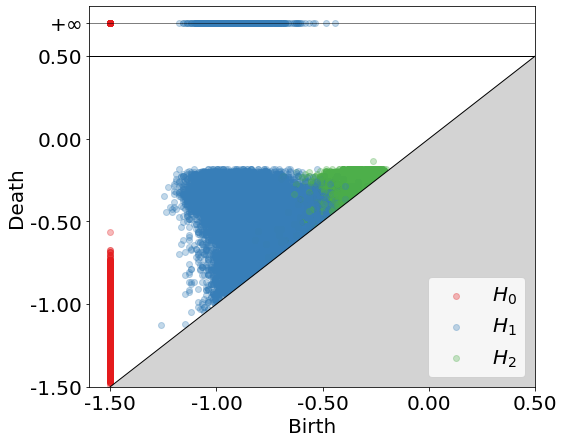

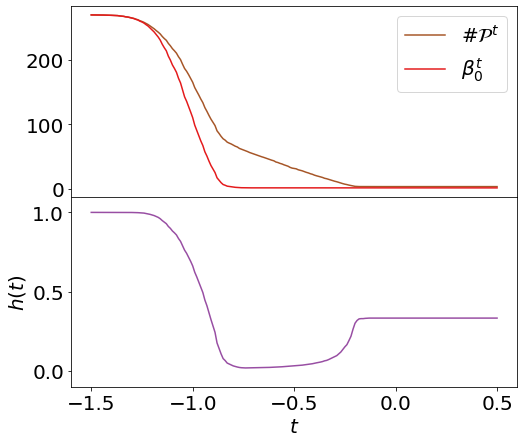

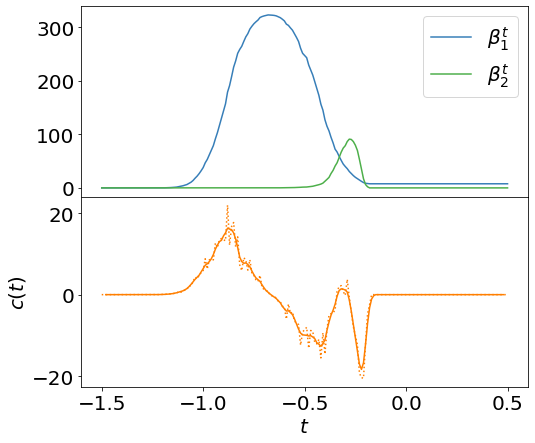

In [15]:
# load data
with open(root_data+'ensemble_sSBM_07-06_15_15.pkl', 'rb') as handle:
    results_ssbm = pickle.load(handle)

persistence_ssbm = results_ssbm['persistence']
bottleneck_ssbm = results_ssbm['bottleneck']
wasserstein_ssbm = results_ssbm['wasserstein']
s_ssbm = np.asarray(results_ssbm["size_partitions"])
b0_ssbm = np.asarray([results_ssbm["bettis"][i][0] for i in range(100)])
b1_ssbm = np.asarray([results_ssbm["bettis"][i][1] for i in range(100)])
b2_ssbm = np.asarray([results_ssbm["bettis"][i][2] for i in range(100)])
h_ssbm = np.asarray(results_ssbm["persistent_hierarchy"])
h_bar_ssbm = np.asarray(results_ssbm["average_persistent_hierarchy"])
c_ssbm = np.asarray(results_ssbm["persistent_conflict"])

# report bottleneck and Wasserstein distance
print('### 100 sSBM realisations ###\n')

for i in range(3):
    print('Mean pair-wise bottleneck distance for {}-dimensional Dgm: '.format(i), np.around(bottleneck_ssbm[:,:,i].mean(),5))
print("\n")
for i in range(3):  
    print('Mean pair-wise 2-Wasserstein distance for {}-dimensional Dgm: '.format(i), np.around(wasserstein_ssbm[:,:,i].mean(),3))

# plot PD
ax = plot_pds(persistence_ssbm, log_scales, alpha=0.3)
plt.savefig(root_fig +'ensemble_sSBM_PD.pdf', bbox_inches='tight')

# plot persistent hierarchy and conflict
colormap = plt.cm.Set1.colors

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(log_scales,s_ssbm.mean(axis=0), label = r'$\#\mathcal{P}^t$', color=colormap[6])
ax1.plot(log_scales,b0_ssbm.mean(axis=0), label = r'$\beta_0^t$', color=colormap[0])
ax1.set(xticks=[])

ax1.legend()
ax2.plot(log_scales,h_ssbm.mean(axis=0), label = r'$h(t)$',c=colormap[3])
ax2.set_ylabel(r'$h(t)$')
ax2.set(xlabel=r'$t$',ylim=(-0.1,1.1))
plt.savefig(root_fig +'ensemble_sSBM_hierarchy.pdf', dpi=fig.dpi,bbox_inches='tight')

print("\nAverage persistent hierarchy:", np.around(h_bar_ssbm.mean(),3))

import pandas as pd

def moving_average(x, w):
    return np.roll(
        np.asarray(pd.Series(x).rolling(window=w, win_type="triang").mean()),
        -int(w / 2),
    )

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]

ax1.plot(log_scales,b1_ssbm.mean(axis=0), label = r'$\beta_1^t$', color=colormap[1])
ax1.plot(log_scales,b2_ssbm.mean(axis=0), label = r'$\beta_2^t$',color=colormap[2])

ax1.set(xticks=[])

ax1.legend()
ax2.plot(log_scales,c_ssbm.mean(axis=0),c=colormap[4],ls=":")
ax2.plot(log_scales,moving_average(c_ssbm.mean(axis=0),5),c=colormap[4])
ax2.set_ylabel(r'$c(t)$')
ax2.set(xlabel=r'$t$')
plt.savefig(root_fig +'ensemble_sSBM_conflict.pdf', dpi=fig.dpi,bbox_inches='tight')
    

## 3) mSBM ensemble

### 100 mSBM realisations ###

Mean pair-wise bottleneck distance for 0-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 1-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 2-dimensional Dgm:  0.01483


Mean pair-wise 2-Wasserstein distance for 0-dimensional Dgm:  0.875
Mean pair-wise 2-Wasserstein distance for 1-dimensional Dgm:  1.175
Mean pair-wise 2-Wasserstein distance for 2-dimensional Dgm:  0.021

Average persistent hierarchy: 0.536


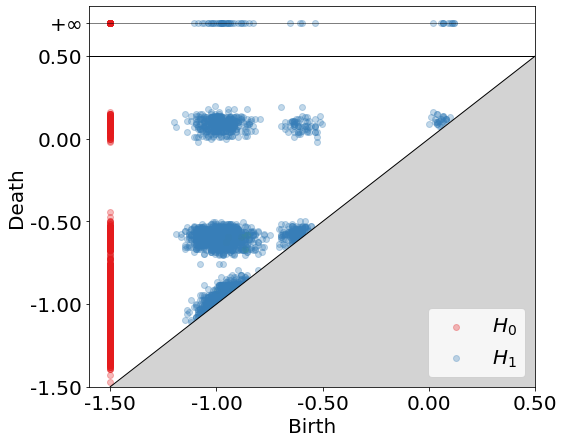

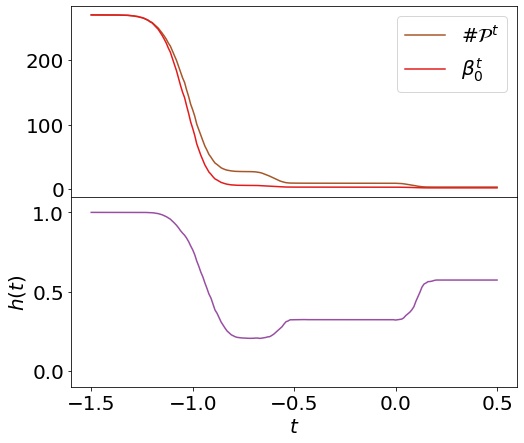

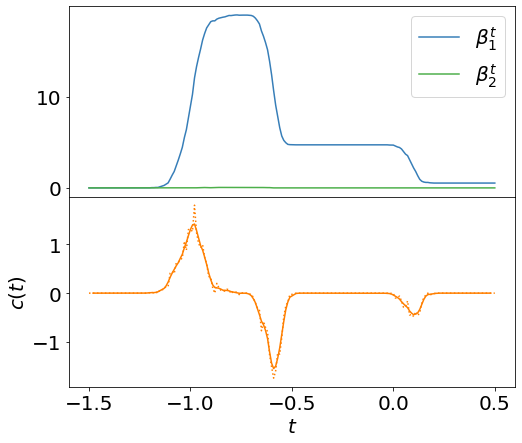

In [16]:
# load data
with open(root_data+'ensemble_mSBM_07-06_14_53.pkl', 'rb') as handle:
    results_msbm = pickle.load(handle)

persistence_msbm = results_msbm['persistence']
bottleneck_msbm = results_msbm['bottleneck']
wasserstein_msbm = results_msbm['wasserstein']
s_msbm = np.asarray(results_msbm["size_partitions"])
b0_msbm = np.asarray([results_msbm["bettis"][i][0] for i in range(100)])
b1_msbm = np.asarray([results_msbm["bettis"][i][1] for i in range(100)])
b2_msbm = np.asarray([results_msbm["bettis"][i][2] for i in range(100)])
h_msbm = np.asarray(results_msbm["persistent_hierarchy"])
h_bar_msbm = np.asarray(results_msbm["average_persistent_hierarchy"])
c_msbm = np.asarray(results_msbm["persistent_conflict"])

# report bottleneck and Wasserstein distance
print('### 100 mSBM realisations ###\n')

for i in range(3):
    print('Mean pair-wise bottleneck distance for {}-dimensional Dgm: '.format(i), np.around(bottleneck_msbm[:,:,i].mean(),5))
print("\n")
for i in range(3):  
    print('Mean pair-wise 2-Wasserstein distance for {}-dimensional Dgm: '.format(i), np.around(wasserstein_msbm[:,:,i].mean(),3))

# plot PD
ax = plot_pds(persistence_msbm, log_scales, alpha=0.3)
plt.savefig(root_fig +'ensemble_mSBM_PD.pdf', bbox_inches='tight')

# plot persistent hierarchy and conflict
colormap = plt.cm.Set1.colors

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(log_scales,s_msbm.mean(axis=0), label = r'$\#\mathcal{P}^t$', color=colormap[6])
ax1.plot(log_scales,b0_msbm.mean(axis=0), label = r'$\beta_0^t$', color=colormap[0])
ax1.set(xticks=[])

ax1.legend()
ax2.plot(log_scales,h_msbm.mean(axis=0), label = r'$h(t)$',c=colormap[3])
ax2.set_ylabel(r'$h(t)$')
ax2.set(xlabel=r'$t$',ylim=(-0.1,1.1))
plt.savefig(root_fig +'ensemble_mSBM_hierarchy.pdf', dpi=fig.dpi,bbox_inches='tight')

print("\nAverage persistent hierarchy:", np.around(h_bar_msbm.mean(),3))

import pandas as pd

def moving_average(x, w):
    return np.roll(
        np.asarray(pd.Series(x).rolling(window=w, win_type="triang").mean()),
        -int(w / 2),
    )

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]

ax1.plot(log_scales,b1_msbm.mean(axis=0), label = r'$\beta_1^t$', color=colormap[1])
ax1.plot(log_scales,b2_msbm.mean(axis=0), label = r'$\beta_2^t$',color=colormap[2])

ax1.set(xticks=[])

ax1.legend()
ax2.plot(log_scales,c_msbm.mean(axis=0),c=colormap[4],ls=":")
ax2.plot(log_scales,moving_average(c_msbm.mean(axis=0),5),c=colormap[4])
ax2.set_ylabel(r'$c(t)$')
ax2.set(xlabel=r'$t$')
plt.savefig(root_fig +'ensemble_mSBM_conflict.pdf', dpi=fig.dpi,bbox_inches='tight')
    

## 4) nhmSBM ensemble

### 100 nh_mSBM realisations ###

Mean pair-wise bottleneck distance for 0-dimensional Dgm:  0.32431
Mean pair-wise bottleneck distance for 1-dimensional Dgm:  inf
Mean pair-wise bottleneck distance for 2-dimensional Dgm:  0.00655


Mean pair-wise 2-Wasserstein distance for 0-dimensional Dgm:  0.609
Mean pair-wise 2-Wasserstein distance for 1-dimensional Dgm:  1.419
Mean pair-wise 2-Wasserstein distance for 2-dimensional Dgm:  0.009

Average persistent hierarchy: 0.429


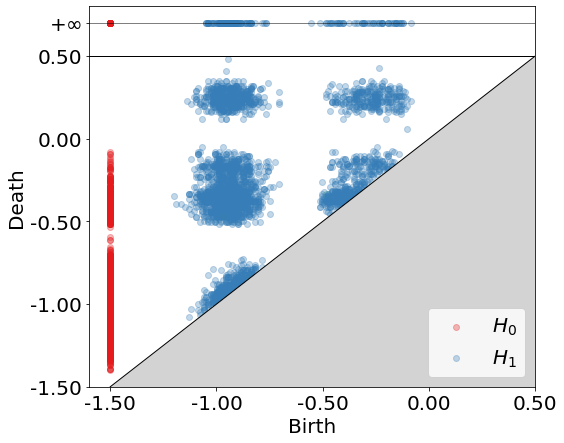

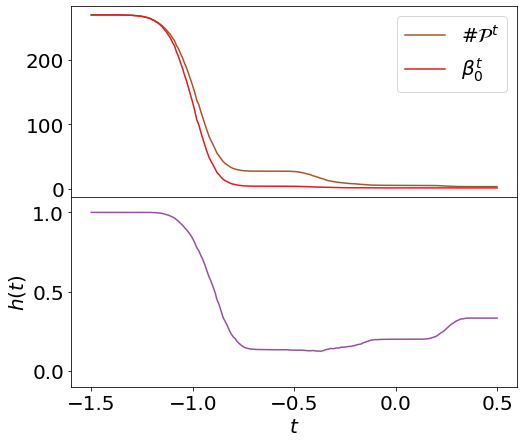

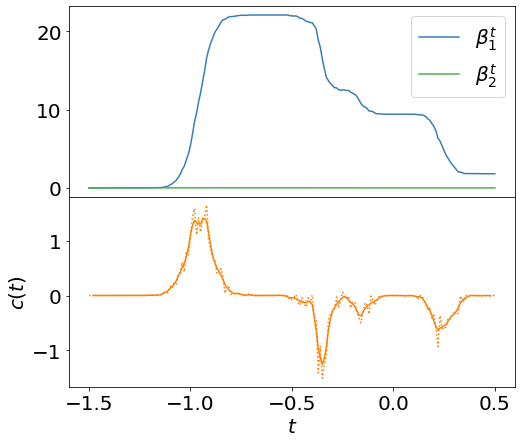

In [17]:
# load data
with open(root_data+'ensemble_nh_mSBM_07-07_11_41.pkl', 'rb') as handle:
    results_nhmsbm = pickle.load(handle)

persistence_nhmsbm = results_nhmsbm['persistence']
bottleneck_nhmsbm = results_nhmsbm['bottleneck']
wasserstein_nhmsbm = results_nhmsbm['wasserstein']
s_nhmsbm = np.asarray(results_nhmsbm["size_partitions"])
b0_nhmsbm = np.asarray([results_nhmsbm["bettis"][i][0] for i in range(100)])
b1_nhmsbm = np.asarray([results_nhmsbm["bettis"][i][1] for i in range(100)])
b2_nhmsbm = np.asarray([results_nhmsbm["bettis"][i][2] for i in range(100)])
h_nhmsbm = np.asarray(results_nhmsbm["persistent_hierarchy"])
h_bar_nhmsbm = np.asarray(results_nhmsbm["average_persistent_hierarchy"])
c_nhmsbm = np.asarray(results_nhmsbm["persistent_conflict"])

# report bottleneck and Wasserstein distance
print('### 100 nh_mSBM realisations ###\n')

for i in range(3):
    print('Mean pair-wise bottleneck distance for {}-dimensional Dgm: '.format(i), np.around(bottleneck_nhmsbm[:,:,i].mean(),5))
print("\n")
for i in range(3):  
    print('Mean pair-wise 2-Wasserstein distance for {}-dimensional Dgm: '.format(i), np.around(wasserstein_nhmsbm[:,:,i].mean(),3))

# plot PD
ax = plot_pds(persistence_nhmsbm, log_scales, alpha=0.3)
plt.savefig(root_fig +'ensemble_nh_mSBM_PD.pdf', bbox_inches='tight')

# plot persistent hierarchy and conflict
colormap = plt.cm.Set1.colors

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]
ax1.plot(log_scales,s_nhmsbm.mean(axis=0), label = r'$\#\mathcal{P}^t$', color=colormap[6])
ax1.plot(log_scales,b0_nhmsbm.mean(axis=0), label = r'$\beta_0^t$', color=colormap[0])
ax1.set(xticks=[])

ax1.legend()
ax2.plot(log_scales,h_nhmsbm.mean(axis=0), label = r'$h(t)$',c=colormap[3])
ax2.set_ylabel(r'$h(t)$')
ax2.set(xlabel=r'$t$',ylim=(-0.1,1.1))
plt.savefig(root_fig +'ensemble_nh_mSBM_hierarchy.pdf', dpi=fig.dpi,bbox_inches='tight')

print("\nAverage persistent hierarchy:", np.around(h_bar_nhmsbm.mean(),3))

import pandas as pd

def moving_average(x, w):
    return np.roll(
        np.asarray(pd.Series(x).rolling(window=w, win_type="triang").mean()),
        -int(w / 2),
    )

fig, axs = plt.subplots(2, figsize=(8, 7))
fig.subplots_adjust(hspace=0.0, wspace=0.3)
ax1 = axs[0]
ax2 = axs[1]

ax1.plot(log_scales,b1_nhmsbm.mean(axis=0), label = r'$\beta_1^t$', color=colormap[1])
ax1.plot(log_scales,b2_nhmsbm.mean(axis=0), label = r'$\beta_2^t$',color=colormap[2])

ax1.set(xticks=[])

ax1.legend()
ax2.plot(log_scales,c_nhmsbm.mean(axis=0),c=colormap[4],ls=":")
ax2.plot(log_scales,moving_average(c_nhmsbm.mean(axis=0),5),c=colormap[4])
ax2.set_ylabel(r'$c(t)$')
ax2.set(xlabel=r'$t$')
plt.savefig(root_fig +'ensemble_nh_mSBM_conflict.pdf', dpi=fig.dpi,bbox_inches='tight')
    